<a href="https://colab.research.google.com/github/Lokitha-S/project/blob/main/ODI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries,dataset.Perform some of the operations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("ODI.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_name               1540 non-null   object
 1   role                      1540 non-null   object
 2   total_runs                1540 non-null   int64 
 3   strike_rate               1540 non-null   object
 4   total_balls_faced         1540 non-null   int64 
 5   total_wickets_taken       1540 non-null   int64 
 6   total_runs_conceded       1540 non-null   int64 
 7   total_overs_bowled        1540 non-null   int64 
 8   total_matches_played      1540 non-null   int64 
 9   matches_played_as_batter  1540 non-null   int64 
 10  matches_played_as_bowler  1540 non-null   int64 
 11  matches_won               1540 non-null   int64 
 12  matches_lost              1540 non-null   int64 
 13  player_of_match_awards    1540 non-null   int64 
 14  team                    

In [ ]:
df.head(2)

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average,percentage
0,V Kohli,Batter,13784,9.170.381.212.161.530,15031,7,681,671,579,579,0,360,219,41,India,1.969.142.857.142.850,"477,93%"
1,KC Sangakkara,Batter,11618,7.939.046.057.127.230,14634,0,0,0,510,510,0,237,273,26,Sri Lanka,0,"442,17%"


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1535,False
1536,False
1537,False
1538,False


df.describe(),df.isnull().sum(),
df.duplicated()


In [ ]:
num_col='matches_won'

In [ ]:
mean_value = df[num_col].mean()
median_value = df[num_col].median()
mode_value = df[num_col].mode()[0]
std_dev = df[num_col].std()
variance = df[num_col].var()
data_range = df[num_col].max() - df[num_col].min()

In [ ]:
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {data_range}")

Mean: 148.4525974025974
Median: 137.5
Mode: 27
Standard Deviation: 118.57929723750318
Variance: 14061.04973334013
Range: 381


In [ ]:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]
print("\nOutliers detected:")
print(outliers[num_col ])


Outliers detected:
Series([], Name: matches_won, dtype: int64)


In [ ]:
df['strike_rate'] = pd.to_numeric(df['strike_rate'],errors='coerce')
df['average'] = pd.to_numeric(df['average'], errors='coerce')
df['percentage'] = pd.to_numeric(df['percentage'], errors='coerce')

In [ ]:
df[['total_runs', 'strike_rate']].corr()

,total_runs,strike_rate
total_runs,1.000000,0.123998
strike_rate,0.123998,1.000000


In [ ]:
df[['total_runs', 'strike_rate']].cov()

,total_runs,strike_rate
total_runs,1.739826e+06,1503.375650
strike_rate,1.503376e+03,8489.196576


Data Visualization

1.Histogram

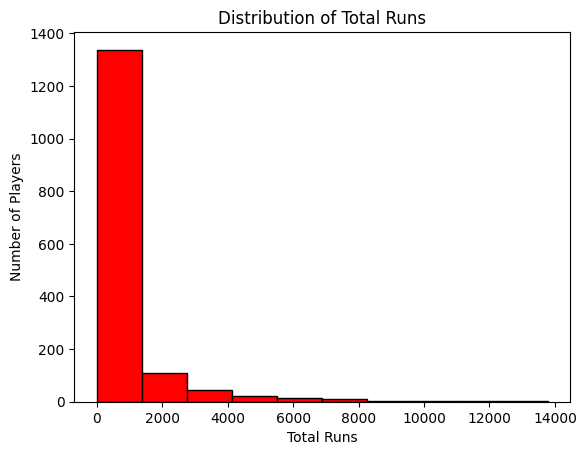

In [ ]:
plt.figure()
plt.hist(df['total_runs'], bins=10, color='red', edgecolor='black')
plt.xlabel("Total Runs")
plt.ylabel("Number of Players")
plt.title("Distribution of Total Runs")
plt.show()

2.Scatter plot

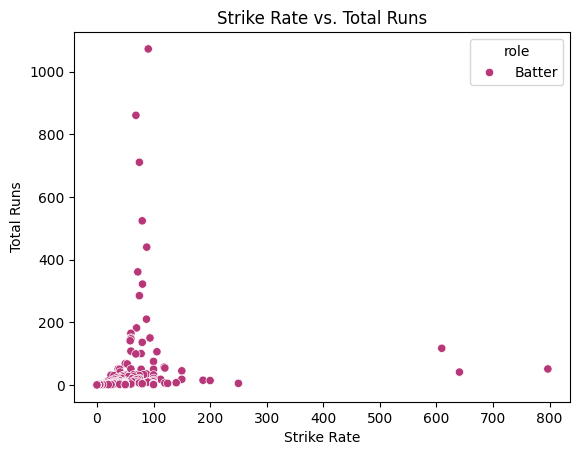

In [ ]:
plt.figure()
sns.scatterplot(x='strike_rate', y='total_runs', hue='role', data=df, palette="magma")
plt.xlabel("Strike Rate")
plt.ylabel("Total Runs")
plt.title("Strike Rate vs. Total Runs")
plt.show()

3.Bar chart

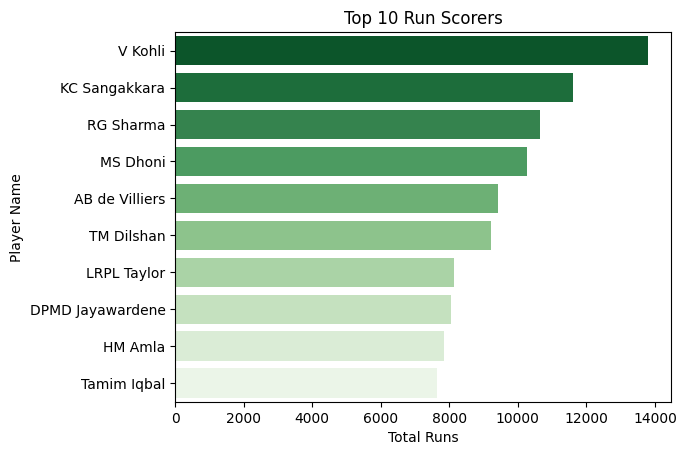

In [ ]:
top_scorers = df.nlargest(10, 'total_runs')
plt.figure()
sns.barplot(x='total_runs', y='player_name', data=top_scorers, palette="Greens_r")
plt.xlabel("Total Runs")
plt.ylabel("Player Name")
plt.title("Top 10 Run Scorers")
plt.show()

4.Boxplot

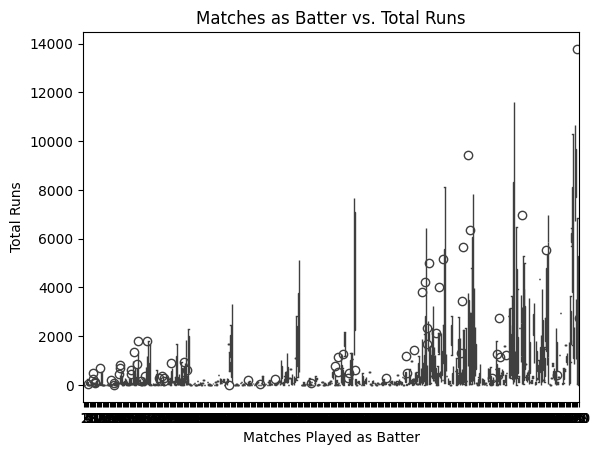

In [ ]:
plt.figure()
sns.boxplot(x='matches_played_as_batter', y='total_runs', data=df)
plt.xlabel("Matches Played as Batter")
plt.ylabel("Total Runs")
plt.title("Matches as Batter vs. Total Runs")
plt.show()

Algorithms to perform-Unsupervised



1.PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
numeric_df = df.select_dtypes(include=['int64'])

In [ ]:
numeric_df.isnull()

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1535,False,False,False,False,False,False,False,False,False,False,False
1536,False,False,False,False,False,False,False,False,False,False,False
1537,False,False,False,False,False,False,False,False,False,False,False
1538,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,11.893420,0.094485
1,8.922220,-0.914877
2,8.713684,-0.564040
3,7.960842,-1.388427
4,7.251446,-0.311747
...,...,...
1535,-2.282195,0.692034
1536,-2.571364,0.806800
1537,-2.815851,0.997893
1538,-2.787238,0.975547


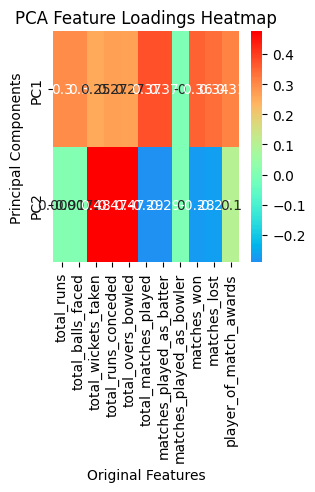

In [ ]:
loading= pd.DataFrame(pca.components_, columns=numeric_df.columns, index=['PC1', 'PC2'])
plt.figure(figsize=(3,3))
sns.heatmap(loading, annot=True, cmap='rainbow', center=0)
plt.title('PCA Feature Loadings Heatmap')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

2.K-Means Cluster


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df['cluster'] = kmeans.labels_

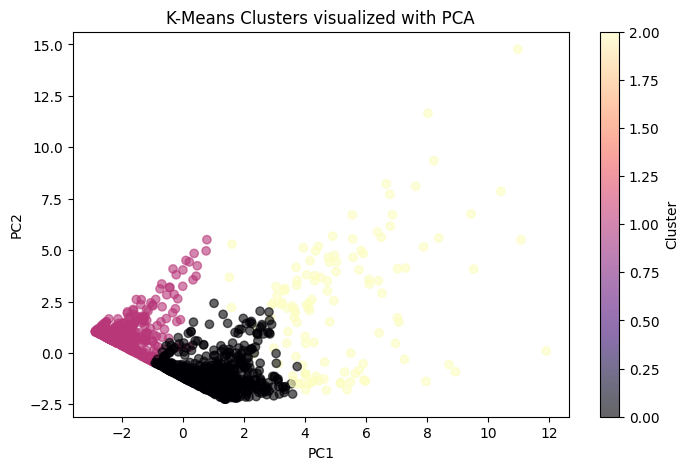

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(pca_components[:,0], pca_components[:,1], c=df['cluster'], cmap='magma', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()

Algorithms to perform-Supervised

1.Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = numeric_df.drop(columns=['total_runs'])
y = numeric_df['total_runs']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 16955.27
R-squared Score: 0.98


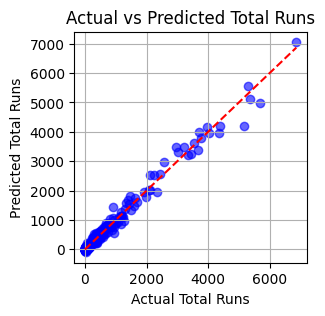

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Total Runs')
plt.ylabel('Predicted Total Runs')
plt.title('Actual vs Predicted Total Runs')
plt.grid(True)
plt.show()

2.Polnomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
subset = df[['total_matches_played', 'total_runs']].head(100)

X = subset[['total_matches_played']]
y = subset['total_runs']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

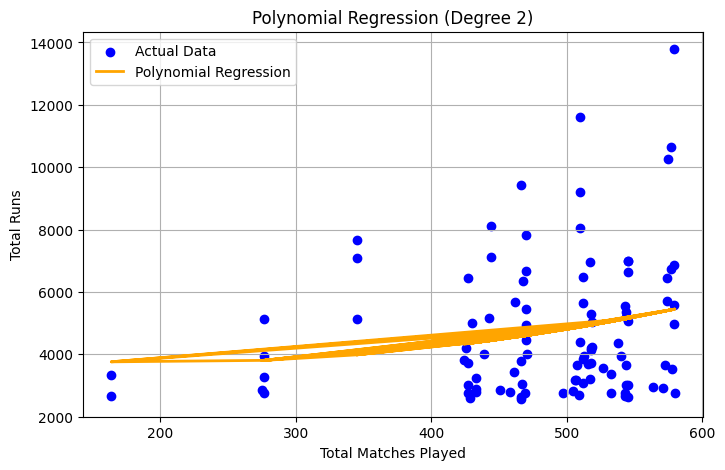

MSE: 4523139.886022998
R² Score: 0.04251056912120732


In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='orange', label='Polynomial Regression', linewidth=2)
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Total Matches Played')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print("MSE:", mean_squared_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))

3.Locally Weighted regression

In [ ]:
subset = df[['total_matches_played', 'total_runs']].head(100)
X = subset['total_matches_played'].values
y = subset['total_runs'].values

In [ ]:
sorted_indices = X.argsort()
X = X[sorted_indices]
y = y[sorted_indices]

In [ ]:
def weights(x, x0, tau):
    return np.exp(-(x - x0) ** 2 / (2 * tau ** 2))

def predict(x0, X, y, tau):
    w = weights(X, x0, tau)
    W = np.diag(w)
    X_design = np.c_[np.ones_like(X), X]
    theta = np.linalg.pinv(X_design.T @ W @ X_design) @ X_design.T @ W @ y
    return np.dot([1, x0], theta)

In [ ]:
tau = 10  # Bandwidth
y_pred = [predict(x0, X, y, tau) for x0 in X]

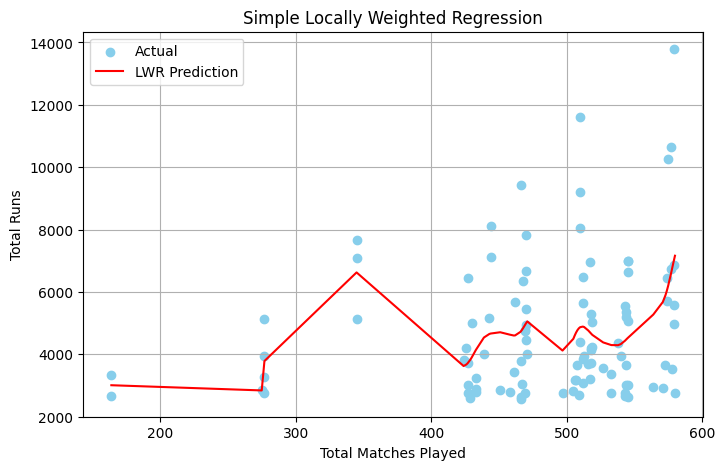

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Actual', color='skyblue')
plt.plot(X, y_pred, color='red', label='LWR Prediction')
plt.xlabel('Total Matches Played')
plt.ylabel('Total Runs')
plt.title('Simple Locally Weighted Regression')
plt.legend()
plt.grid(True)
plt.show()


4.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
features = ['total_runs', 'total_balls_faced', 'total_wickets_taken',
            'total_runs_conceded', 'total_overs_bowled', 'total_matches_played',
            'matches_played_as_batter', 'matches_played_as_bowler',
            'matches_won', 'matches_lost', 'player_of_match_awards']

X = df[features]
y = df['role']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.38      0.18         8
           1       0.50      0.17      0.25         6
           2       0.06      0.33      0.10         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
   

In [ ]:
import seaborn as sns

In [ ]:
features = ['total_runs', 'total_balls_faced', 'total_wickets_taken',
            'total_runs_conceded', 'total_overs_bowled', 'total_matches_played',
            'matches_played_as_batter', 'matches_played_as_bowler',
            'matches_won', 'matches_lost', 'player_of_match_awards']

X = df[features]
y = df['role']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

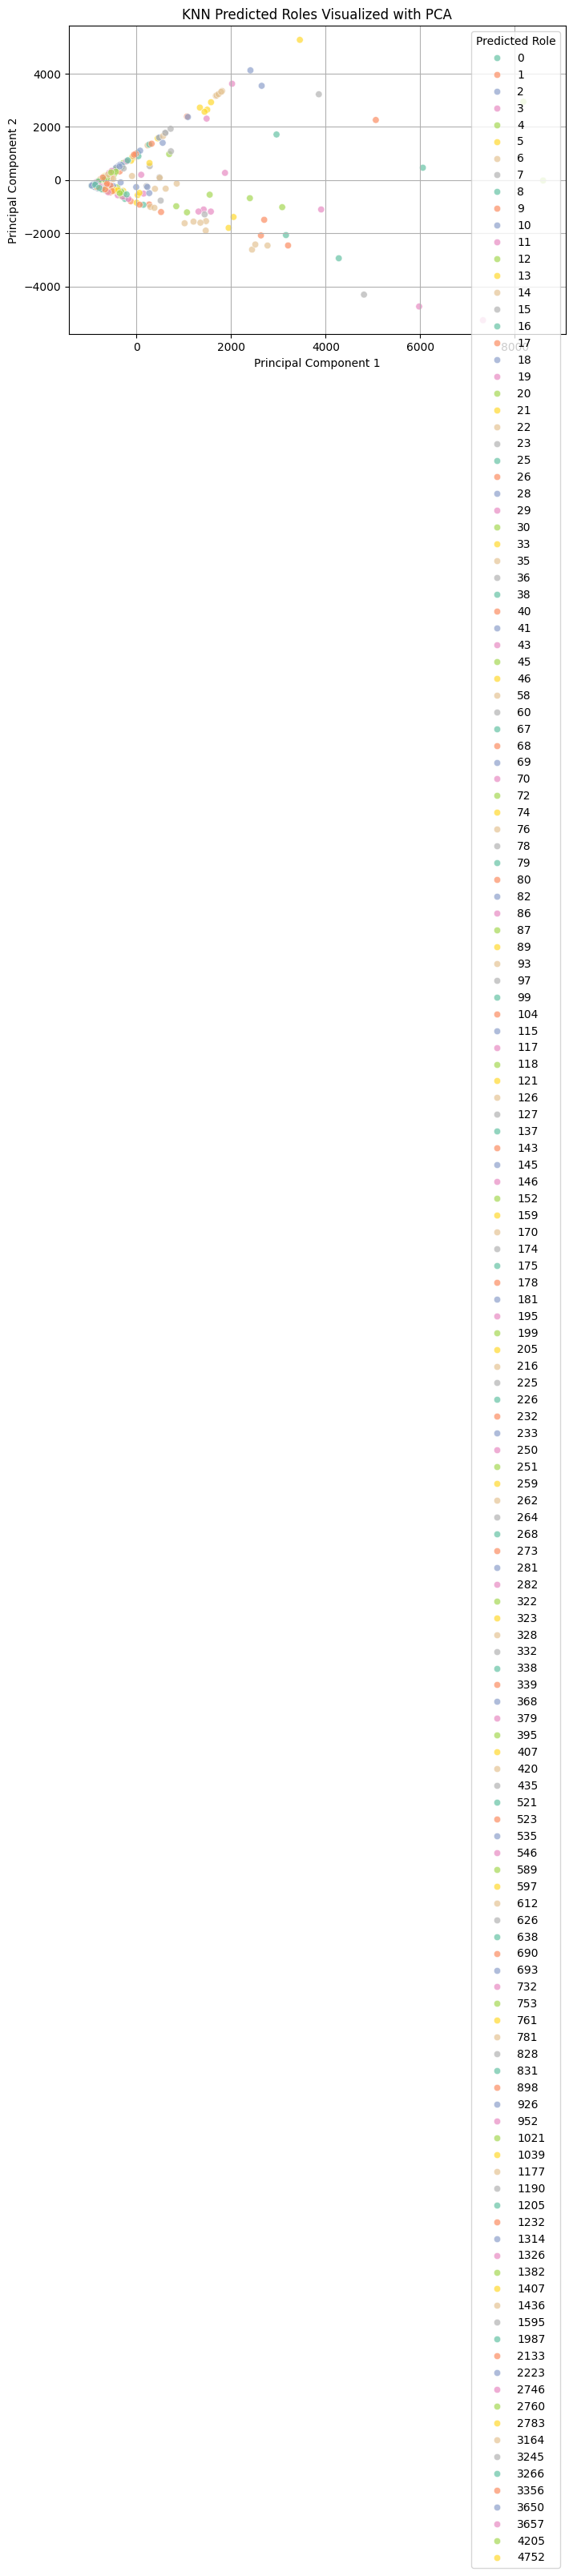

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='Set2', alpha=0.7)
plt.title('KNN Predicted Roles Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Role')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

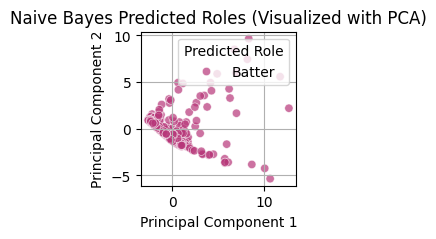

In [ ]:
plt.figure(figsize=(2, 2))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='magma', alpha=0.7)
plt.title('Naive Bayes Predicted Roles (Visualized with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Role')
plt.grid(True)
plt.show()

Decesion tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_model = df[['role', 'total_runs', 'total_balls_faced', 'total_wickets_taken',
               'total_runs_conceded', 'total_overs_bowled', 'total_matches_played',
               'matches_played_as_batter', 'matches_played_as_bowler',
               'matches_won', 'matches_lost', 'player_of_match_awards']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_model['role'] = label_encoder.fit_transform(df_model['role'])

In [ ]:
X = df_model.drop(columns=['role'])
y = df_model['role']

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

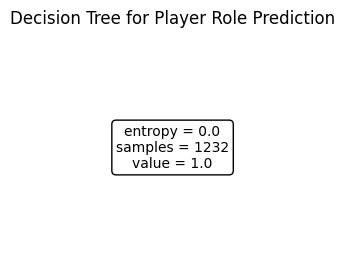

In [ ]:
plt.figure(figsize=(3, 3))
plot_tree(model,
          feature_names=X.columns,
          class_names=label_encoder.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Player Role Prediction")
plt.show()

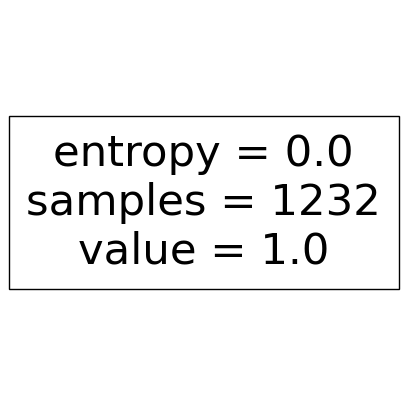

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
model.fit(X_train,y_train)
plt.figure(figsize=(5,5))
plot_tree(model, feature_names=X.columns,class_names=label_encoder.classes_,filled=True)
plt.show()

In [ ]:
# Step 1: Select relevant columns
df = df[['role', 'total_runs', 'total_balls_faced', 'total_wickets_taken',
         'total_runs_conceded', 'total_overs_bowled', 'total_matches_played',
         'matches_played_as_batter', 'matches_played_as_bowler',
         'matches_won', 'matches_lost', 'player_of_match_awards', 'team']]

# Step 2: Handle missing values (if any)
# (Assume numeric columns are already clean, but check anyway)
df.fillna(df.median(numeric_only=True), inplace=True)
df['team'].fillna(df['team'].mode()[0], inplace=True)

# Step 3: Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['team'] = label_encoder.fit_transform(df['team'])
df['role'] = label_encoder.fit_transform(df['role'])  # Target label encoding

# Step 4: Define features and target
x = df.drop(columns=['role'])  # Features
y = df['role']                # Target (encoded role)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

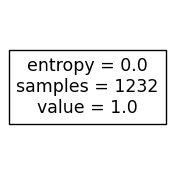

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
model.fit(x_train,y_train)
plt.figure(figsize=(2,2))
plot_tree(model, feature_names=x.columns,class_names=['Not Survived','Survived'],filled=True)
plt.show()